# HW1(10/14)

## 第一題[myknn_regressor]

### Q1.1 Create your myknn_regressor based on the skeleton.
* use the "brute-force" method to find the nearest neighbors.
* set "equal_weight"
* set "remove_outliers"

#### import packages

In [2]:
import numpy as np
import pickle

In [30]:
class myknn_regressor():
    def __init__(self, n_neighbors, mean_type):
        """mean_type can be equal_weight or remove_outliers.
                              equal_weight use the same weight for all neighbors.
                              remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 + 1.5IQR]."""
        ### Add your code here ### 
        self.n_neighbors = n_neighbors
        self.mean_type = mean_type
        
    def fit(self, x_train, y_train):
         ### Add your code here ###
        self.stand_x_train =  self.standardize(x_train)
        self.y_train = y_train
    
    #### Equal_weight ####
    def equal_weight(self,x):
        return sum(x)/len(x)
    
    #### Remove_outliers ####
    def remove_outlier(self,x):
        list_x = []
        q1, q3= np.percentile(x, [25,75])
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr) 
        upper_bound = q3 + (1.5 * iqr)
        for i in range(len(x)):
            if lower_bound <= x[i] <= upper_bound:
                list_x.append(x[i])
        return list_x
    
    #### Create L2 Norm ####
    
    def eu_dist(self,x,y):
        return np.sqrt(np.sum((x - y)**2, axis=0))
    
    #### Standardization ####
    ## operands could not be broadcast together with shapes (3000,90) (5000,90) ##
    ## need to standarize the x ,y ##
    
    def standardize(self,x):
        y = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
        return y
    
    #### Create own KNN ####
   
    def myknn(self,x_test):
        
        stand_x_test = self.standardize(x_test)
        dist_arr=[]
        for x in stand_x_test:
            point_dist= []
            for train_x in self.stand_x_train:
                dist = self.eu_dist(x,train_x)
                point_dist.append(dist)
            dist_arr.append(point_dist)
        
        list_y =[]
        for dist in dist_arr:
            sorted_index=[index for index,num in sorted(enumerate(dist),key = lambda x:x[-1])]
            min_sorted_index = sorted_index[:self.n_neighbors]
            pred_y = []
            for i in min_sorted_index:
                y = self.y_train[i]
                pred_y.append(y)
            list_y.append(pred_y)
        
        return np.array(list_y)
    
    #### Prediction ####
    def predict(self, x_test):
        
        ### Add your code here ###
        #### First KNN ####
        neighbors = self.myknn(x_test)
        
        predict_val =[]
        for neighbor in neighbors:
        
            if(self.n_neighbors < 10):
                val = self.equal_weight(neighbor)
                predict_val.append(val)
            else:
                """use remove_outliers only if k>=10"""
                #### 要求使用 remove_outliers #####
                #### 得出的結論要再取一次平均 ####
                #### 此時 val 為一個陣列 ####
                if(self.mean_type == "remove_outliers"):
                    val = self.remove_outlier(neighbor)
                    val = self.equal_weight(val)
                    predict_val.append(val)
                else:
                    val = self.equal_weight(neighbor)
                    predict_val.append(val)

        y_pred = np.array(predict_val)
        return y_pred

#### 輸入dataset

In [31]:
from sklearn import preprocessing


# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train_scaled = xscaler.transform(msd_data['X_train'])
    X_test_scaled = xscaler.transform(msd_data['X_test'])
else:
    X_train_noscale = msd_data['X_train']
    X_test_no_sclae = msd_data['X_test']

    
# no scale
X_train = msd_data['X_train']
X_test = msd_data['X_test']
Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

#### 觀察資料

In [112]:
msd_data
Y_test.shape

(3000,)

#### RMSE calculation

In [33]:
def RMSE(pred, ans):
    sum= 0
    for i in range(len(ans)):
        diff = (pred[i] - ans[i])**2
        sum += diff
    rmse = np.sqrt(sum/(len(ans)))
    np_rmse = np.array(rmse)
    return np_rmse

#### Q1.2 Make predictions using k=20 and "equal_weight"
* Standardize all feature values to have a zero mean and unit variance before training a KNN model
* List the RMSE and the first 20 predictions in the test data.

In [34]:
myknn_1 = myknn_regressor(20, "equal_weight")
myknn_1.fit(X_train_scaled, Y_train)
ypred_1 = myknn_1.predict(X_test_scaled)
rmse_1 = RMSE(ypred_1,Y_test)
print("RMSE:",rmse_1)
print("First 20 predictions: ",ypred_1[:20])

RMSE: 10.292158827638321
First 20 predictions:  [1992.9  1994.05 2000.05 1991.5  1992.8  1998.5  1987.1  1990.9  2001.8
 2003.   2001.15 1998.65 1995.55 1997.2  1995.05 1997.35 1992.15 1999.1
 2003.6  1995.75]


#### Q1.3 Make predictions using k=20 and "remove_outliers"
* Standardize all feature values to have a zero mean and unit variance before training a KNN model
* List the RMSE and the first 20 predictions in the test data.

In [35]:
myknn_2 = myknn_regressor(20, "remove_outliers")
myknn_2.fit(X_train_scaled, Y_train)
ypred_2 = myknn_2.predict(X_test_scaled)
rmse_2 = RMSE(ypred_2,Y_test)
print("RMSE:",rmse_2)
print("First 20 predictions: ",ypred_2[:20])

RMSE: 10.225720983625134
First 20 predictions:  [1992.9        1994.05       2000.05       1992.73684211 1992.8
 2000.         1987.1        1990.9        2001.8        2003.94736842
 2001.15       2000.94444444 1995.55       1997.2        1998.61111111
 1997.35       1992.15       2004.23529412 2003.6        1995.75      ]


#### Result
1. remove_outliers 的RMSE相較 equal_weight 的低一點點，應該是因為已經先去除一些雜值之後，效果變好。然而差異不大，應該是因為本身的資料沒有太多差異較大的值。

## 第二題 [Tuning the Hyper-parameter]
* Use the KNN regressor from sklearn.neighbors.KNeighborsRegressor for the first two settings
* Use myknn_regressor for the third setting.
* For each setting, plot a curve that shows the relations between  𝑘  (x-axis) and RMSE (y-axis)

In [36]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

##### Functions

In [37]:
k_list = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

#### Case 1
* all feature values are standardized to have unit variances and zero means.
* caluclate the RMSE


In [38]:
rmse_sk_list =[]
for i in k_list:
    sk_knn = KNeighborsRegressor(n_neighbors= i, algorithm='brute')
    sk_knn.fit(X_train_scaled,Y_train)
    pred_sk = sk_knn.predict(X_test_scaled)
    rmse_sk = RMSE(pred_sk,Y_test)
    rmse_sk_list.append(rmse_sk)
    print("RMSE of",i,":",rmse_sk)

RMSE of 1 : 13.911074724837043
RMSE of 2 : 12.068170946750795
RMSE of 3 : 11.389120864846118
RMSE of 4 : 11.1123354880961
RMSE of 5 : 10.894692897614583
RMSE of 10 : 10.425998912973917
RMSE of 15 : 10.318171959828582
RMSE of 20 : 10.251264515495954
RMSE of 25 : 10.237627225094682
RMSE of 30 : 10.215977156359507
RMSE of 35 : 10.205243203546752
RMSE of 40 : 10.204332770527747
RMSE of 45 : 10.20724317182286
RMSE of 50 : 10.206033712139769
RMSE of 55 : 10.20886238444681
RMSE of 60 : 10.217002627247632
RMSE of 80 : 10.231954198429065
RMSE of 100 : 10.24729594738695
RMSE of 120 : 10.264908458982786
RMSE of 140 : 10.287098382403649
RMSE of 160 : 10.317788599090445
RMSE of 180 : 10.330995620176944
RMSE of 200 : 10.351940397014145


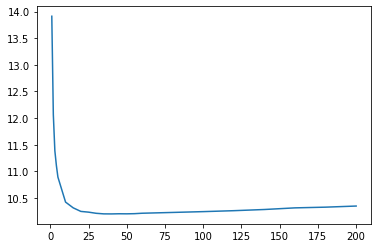

In [39]:
# plt with scale
plt.plot(k_list, rmse_sk_list)
plt.show()

#### Case 2
* do not apply feature scaling.

In [40]:
rmse_sk_n_list=[]
for i in k_list:
    sk_knn = KNeighborsRegressor(n_neighbors= i, algorithm='brute')
    sk_knn.fit(X_train,Y_train)
    pred_sk_n = sk_knn.predict(X_test)
    rmse_sk_n = RMSE(pred_sk_n,Y_test)
    rmse_sk_n_list.append(rmse_sk_n)
    print("RMSE of",i,"with no scaling:",rmse_sk_n)

RMSE of 1 with no scaling: 14.923638966418345
RMSE of 2 with no scaling: 12.777499755429464
RMSE of 3 with no scaling: 12.075674967716077
RMSE of 4 with no scaling: 11.767805657810635
RMSE of 5 with no scaling: 11.466392632384453
RMSE of 10 with no scaling: 11.077460900404935
RMSE of 15 with no scaling: 10.88897913794797
RMSE of 20 with no scaling: 10.797788546734951
RMSE of 25 with no scaling: 10.790073017979692
RMSE of 30 with no scaling: 10.750265612567011
RMSE of 35 with no scaling: 10.717738719772298
RMSE of 40 with no scaling: 10.714437504678774
RMSE of 45 with no scaling: 10.698494013475859
RMSE of 50 with no scaling: 10.69110105960404
RMSE of 55 with no scaling: 10.68260873412441
RMSE of 60 with no scaling: 10.672535729098705
RMSE of 80 with no scaling: 10.662907517124506
RMSE of 100 with no scaling: 10.677019504524656
RMSE of 120 with no scaling: 10.68313963899639
RMSE of 140 with no scaling: 10.687017556442067
RMSE of 160 with no scaling: 10.691630026202139
RMSE of 180 with n

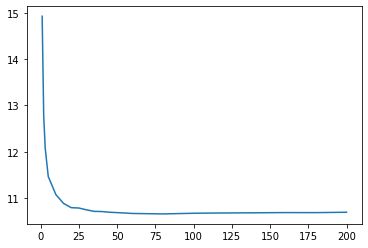

In [41]:
# plt with noscale
plt.plot(k_list, rmse_sk_n_list)
plt.show()

#### Case 3
*  standardized features and adopted myknn_regressor with "remove_outlier"

In [42]:
rmse_sk_3_list=[]
for i in k_list:
    myknn_3 = myknn_regressor(i, "remove_outliers")
    myknn_3.fit(X_train_scaled, Y_train)
    ypred_3 = myknn_3.predict(X_test_scaled)
    rmse_3 = RMSE(ypred_3,Y_test)
    rmse_sk_3_list.append(rmse_3)
    print("RMSE of",i,"using my_knn :",rmse_3)

RMSE of 1 using my_knn : 13.94019368588543
RMSE of 2 using my_knn : 12.097861381252473
RMSE of 3 using my_knn : 11.448255568231989
RMSE of 4 using my_knn : 11.043653909221652
RMSE of 5 using my_knn : 10.900440969673362
RMSE of 10 using my_knn : 10.514337993290836
RMSE of 15 using my_knn : 10.343823629898093
RMSE of 20 using my_knn : 10.225720983625134
RMSE of 25 using my_knn : 10.213345451143013
RMSE of 30 using my_knn : 10.1880791936093
RMSE of 35 using my_knn : 10.161597862384475
RMSE of 40 using my_knn : 10.095243787687686
RMSE of 45 using my_knn : 10.056682304105303
RMSE of 50 using my_knn : 10.089018275220822
RMSE of 55 using my_knn : 10.076818047624421
RMSE of 60 using my_knn : 10.089731397690315
RMSE of 80 using my_knn : 10.067742577227312
RMSE of 100 using my_knn : 10.063088284816114
RMSE of 120 using my_knn : 10.088531815151669
RMSE of 140 using my_knn : 10.105973734512313
RMSE of 160 using my_knn : 10.10905585091357
RMSE of 180 using my_knn : 10.143134931440638
RMSE of 200 us

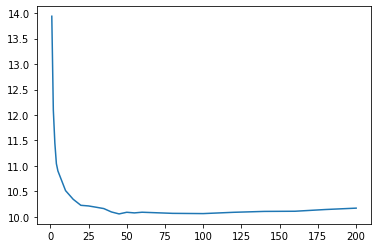

In [43]:
# plt wuth my_knn
plt.plot(k_list, rmse_sk_3_list)
plt.show()

#### Result

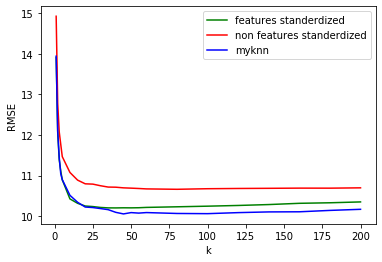

In [44]:
# plt three resuult together
plt.plot(k_list, rmse_sk_list, color='green', label='features standerdized')
plt.plot(k_list, rmse_sk_n_list, color='red', label='non features standerdized')
plt.plot(k_list, rmse_sk_3_list, color='blue', label='myknn')
plt.legend()

plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

#### Result
1. RMSE 皆在0-25的區間快速下降
2. 沒有標準化的特徵明顯誤差高於其他兩項
3. 在選取 K 值的時候可以選的較大
4. 自己做的my_knn 明顯化的時間很多，大約花了20 多分鐘

## Case 3 [Lasso Regression]

#### Q3.1 推導新的Coordinate Descent with Soft Thresholding公式


$$
w_j = \frac{\sum^N_{i=1}(y_i-\tilde{w^T_{-j}\phi_{n,-j}})\phi_{i,j}-\lambda sgn(w_j)}{n\sum^N_{i=1} \phi^2_{i,j}}
$$

#### Q3.2 mylasso
* 盡量做矩陣運算
* 這裡將 dL/dw 改寫成
$$
\frac{dL(w)}{dw_j} = \frac{-1}{N}\rho_j+\frac{1}{N}\tilde{w_j}z_j
$$
$$
\rho_j = (\sum^N_{i=1}\tilde{-x^{i}_j}(y^i-(\sum^N_{k \neq j}\tilde{w_k}\tilde{x_j})))
$$
$$
z_j= (\sum^N_{i=1}\tilde{x^{i}_j})^2
$$

* 做 rho_compute => calculate sum of residual
* 做 z_compute => calculate the regulariser term

##### 輸入資料

In [131]:
#load the dataset, and create normalized and raw features. 

np.set_printoptions(suppress=True)

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
#standardize feature values
X_train_sd = xscaler.transform(msd_data['X_train'])
X_test_sd = xscaler.transform(msd_data['X_test'])

#outcome values
Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']



5000


##### 製作 my_lasso

In [122]:
class mylasso():
    def __init__(self, lamcoef = 0.1, max_iter=1000, tol=1e-6, const_regu = False):
        """lamcoef: the regularization coefficient
           max_iter: maximum number of iteration for model training
           tol: tolerance for the stopping criteria for model training
           const_regu: whether the constant term should be regularized, default to False
           """
        ### Add your code here ###
        self.lamcoef = lamcoef
        self.max_iter = max_iter
        self.tol = tol
        self.const_regu = const_regu
        

    def fit(self, x_train, y_train, winit = "ridge", keep_traindata = True, verbose = False):
        """Fit a Lasso model
           x_train: a numpy matrix that contains training features
           y_train: a numpy matrix that contains the label
           winit: how weights are initialized, default to "ridge", ridge regression
           keep_traindata: whether the object is going to keep training data after the training process completed
           verbose: output a lot of message"""
        ### Add your code here ###
        self.x_train = x_train
        self.y_train = y_train
        
        self.winit = winit
        self.keep_traindata = keep_traindata
        self.verbose = verbose
        
        #### 加上常數項 ####
        #x_train中沒有一個全為1的Column，也就是說模型要自己加上常數項
        self.x_withconst = np.column_stack((np.ones((x_train.shape[0],1)),x_train)) 
        #### calculate the weight ####
        
        self.w = np.zeros(self.x_withconst.shape[1], dtype = float)
        
        #### pre cal z ####
        self.z_origin = np.sum(self.x_withconst*self.x_withconst, axis = 0)
        
    #### calculate the matrix ####
    def predictions(self,x_withconst, weight):
        prediction = np.matmul(x_withconst,weight) # n x 1
        return(prediction)
        
    #### rho computation #####
    def rho_compute(self,y_train,x_withconst,weight,j):
        #j is the feature selector
        x_j = x_withconst[j]
        w_j= weight[j]
        x_k = np.delete(x_withconst,j,1) #Remove the j variable i.e. j column
        w_k = np.delete(weight,j) #Remove the weight j
        w_0 = x_j.dot(w_j)
        predict_k = self.predictions(x_k, w_k)
        residual = y_train - predict_k
        rho_j = np.sum(x_withconst[:,j]*residual)
        return(rho_j)
        
        
        
    #### calculate weight ####
    def coordinate_descent(self,y,x_withconst):
        max_iter = self.max_iter
        iteration = 0
        new_w = self.w
        z = self.z_origin
        while(max_iter > iteration):
            iteration += 1
 
            for j in range(len(new_w)): 
                rho_j = self.rho_compute(y,x_withconst,new_w,j)
                if j == 0: 
                    new_w[j] = rho_j/z[j]
                elif rho_j < -self.lamcoef*len(y):
                    new_w[j] = (rho_j + (self.lamcoef*len(y)))/z[j]
                elif rho_j > -self.lamcoef*len(y) and rho_j < self.lamcoef*len(y):
                    new_w[j] = 0.
                elif rho_j > self.lamcoef*len(y):
                    new_w[j] = (rho_j - (self.lamcoef*len(y)))/z[j]
                else:
                    new_w[j] = np.NaN

        return new_w
        


    def predict(self, x_test):
        """Make prediction using trained model"""

        ### Add your code here ###
        w = self.coordinate_descent(self.y_train,self.x_withconst)
        x_with_intercept = np.column_stack((np.ones((x_test.shape[0],1)),x_test)) 
     
        return (x_with_intercept.dot(w), w)
       
            

#### Q 3.3 載入資料集，並且使用訓練資料計算Lasso Regression的權重，設定lamcoef = 0.1
* 列出Training Loss、RMSE in Training Data、MAE in Training Data、Intercept、Feature Weights 、非零權重的個數。
* 為了讓結果容易閱讀，請使用`np.set_printoptions(suppress=True)`關閉Scientific Notation。

#### Loss Calculation

In [115]:
#### calculate loss
def loss_cal(pred,ans,weight,lamcoef):
    total_loss=0
    weight_loss=0
    for i in range(len(ans)):
        diff = (pred[i]-ans[i])**2
        total_loss+= diff
    total_loss = total_loss/(2*(len(ans)))
    weight_loss = np.sum(weight, axis = 0)
    weight_loss = weight_loss/(len(ans))
    total_loss +=lamcoef*weight_loss
    return total_loss

#### MAE Calculation

In [116]:
##### MAE
def MAE(pred, ans):
    sum= 0
    for i in range(len(ans)):
        diff = abs(pred[i] - ans[i])
        sum += diff
    mae = sum/(len(ans))
    np_mae = np.array(mae)
    return np_mae

#### Non-zero Calculation

In [117]:
#### non_zero
def non_zero_cal(weight):
    cnt =0
    for i in range(len(weight)):
        if(weight[i]!=0):
            cnt+=1
    return cnt

In [132]:
mlo = mylasso(lamcoef = 0.1)
mlo.fit(X_train_sd, Y_train)
ypred_lasso_train , feature_weight_train = mlo.predict(X_train_sd)

In [134]:
loss = train_loss_cal(ypred_lasso_train,Y_train,feature_weight,0.01)
print("Training Loss :" , loss)
print("RMSE in training data :", RMSE(ypred_lasso_train,Y_train))
print("MAE in training data :" , MAE(ypred_lasso_train,Y_train ))
print("Intercept :" ,feature_weight_train[0] )
print("Feature wights : ")
print(feature_weight_train[1:])
non_zero_cnt = non_zero_cal(feature_weight_train[1:])
print("Number of non-zero wieghts :",non_zero_cnt)


Training Loss : 47.2393169329714
RMSE in training data : 9.719600578519927
MAE in training data : 6.980979212276891
Intercept : 1998.266
Feature wights : 
[ 4.65149469 -2.45726579 -1.06326999  0.         -0.34231573 -2.94695043
  0.         -0.39967846 -0.42647184  0.         -0.23508782 -0.39505721
  0.50377845  0.         -0.33977548  0.61321153  0.15721976  0.43025983
  0.43548803  1.12847847  0.40665286  0.          1.78001172  0.
 -0.16839325  0.07844224  0.66198864  0.01250811  0.15398749  0.
 -0.21773677 -0.22184915  0.         -0.0026038  -0.01729687 -0.26084155
  0.          0.28998407  0.34870842  0.         -0.26111139 -0.14456046
 -0.01017548  0.03508809 -0.03985507  0.          0.00309025 -0.17737277
  0.          0.06481336  0.27116205  0.          0.          0.
  0.          0.         -0.6373202   0.23816168 -0.18988466  0.
 -0.18883914  0.         -0.13593493  0.06122665 -0.2662238   0.
  0.          0.         -0.03118913  0.         -0.19311313  0.01225373
  0.20725

##### Q3.4 列出前五筆資料的預測年分、Test RMSE、Test MAE。


In [136]:
ypred_lasso_test , feature_weight_test = mlo.predict(X_test_sd)

In [137]:
print("RMSE in testing data :", RMSE(ypred_lasso_test,Y_test))
print("MAE in testing data :" , MAE(ypred_lasso_test,Y_test ))
print("Prediction of first five data :",ypred_lasso_test[:5])

RMSE in testing data : 9.648443085014055
MAE in testing data : 6.921387847490453
Prediction of first five data : [1991.93312327 1999.07320633 2001.75518225 1991.30428095 1994.42458692]


##### Q3.5 使用下面的 𝜆 訓練模型: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2。
* 記錄每一個 𝜆 的Training Loss、Number of Nonzero Weights、Average Weight Size (Mean of Absolute Weight)、Training RMSE、Test RMSE
* 將所有的結果列表、畫折線圖、並寫下你對結果的觀察。

In [138]:
lambda_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]  

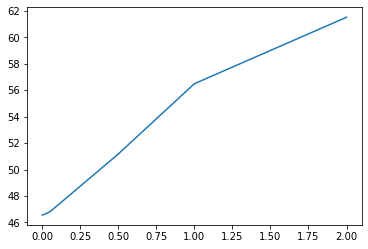

In [142]:
#### Training Loss
train_loss_list=[]
for lam in lambda_list:
    mlo = mylasso(lam)
    mlo.fit(X_train_sd, Y_train)
    ypred_lasso_train , feature_weight_train = mlo.predict(X_train_sd)
    loss = train_loss_cal(ypred_lasso_train,Y_train,feature_weight,lam)
    train_loss_list.append(loss)

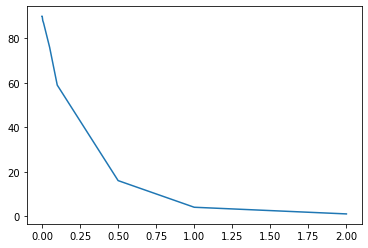

In [143]:
#### Number of Nonzero Weights
weight_loss_list=[]
for lam in lambda_list:
    mlo = mylasso(lam)
    mlo.fit(X_train_sd, Y_train)
    ypred_lasso_train , feature_weight_train = mlo.predict(X_train_sd)
    non_zero_cnt = non_zero_cal(feature_weight_train[1:])
    weight_loss_list.append(non_zero_cnt)
plt.plot(lambda_list,weight_loss_list)
plt.show()
plt.xlabel('lambda')
plt.ylabel('Nonzero Count')

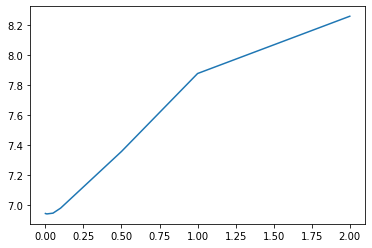

In [144]:
#### MAE
train_mae_list=[]
for lam in lambda_list:
    mlo = mylasso(lam)
    mlo.fit(X_train_sd, Y_train)
    ypred_lasso_train , feature_weight_train = mlo.predict(X_train_sd)
    mae = MAE(ypred_lasso_train,Y_train )
    train_mae_list.append(mae)
plt.plot(lambda_list,train_mae_list)
plt.show()
plt.xlabel('lambda')
plt.ylabel('MAE')

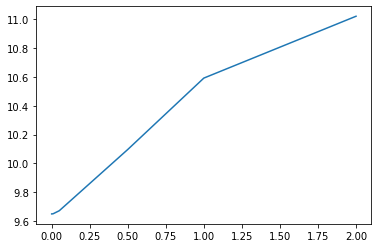

In [145]:
#### Training RMSE
train_rmse_list=[]
for lam in lambda_list:
    mlo = mylasso(lam)
    mlo.fit(X_train_sd, Y_train)
    ypred_lasso_train , feature_weight_train = mlo.predict(X_train_sd)
    rmse = RMSE(ypred_lasso_train,Y_train)
    train_rmse_list.append(rmse)
plt.plot(lambda_list,train_rmse_list)
plt.show()
plt.xlabel('lambda')
plt.ylabel('Train_RMSE')

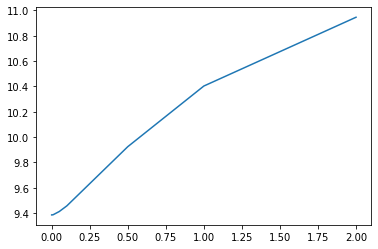

In [147]:
#### Testing RMSE
test_rmse_list=[]
for lam in lambda_list:
    mlo = mylasso(lam)
    mlo.fit(X_test_sd, Y_test)
    ypred_lasso_test , feature_weight_test = mlo.predict(X_test_sd)
    rmse_t = RMSE(ypred_lasso_test,Y_test)
    test_rmse_list.append(rmse_t)
plt.plot(lambda_list,test_rmse_list)
plt.show()
plt.xlabel('lambda')
plt.ylabel('Test_RMSE')

Text(0, 0.5, 'RMSE')

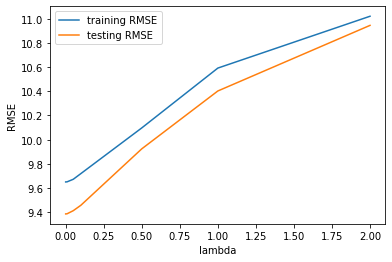

In [148]:
plt.plot(lambda_list,train_rmse_list, label='training RMSE')
plt.plot(lambda_list,test_rmse_list, label='testing RMSE')
plt.legend()

plt.xlabel('lambda')
plt.ylabel('RMSE')

##### Result
1. training loss , RMSE, MAE 街隨著 lambda變大而增加，顯示隨著模型彈性越僵硬，誤差值越大
2. nonzero wieght 隨著lambda增加，數量減少
3. training 的RMSE比 testing 的RMSE大一點點，不過差距不大

### 